### Classify CFAR10 images using CNN

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
from matplotlib import pyplot
from scipy.misc import toimage
from PIL import Image

C:\Amrendra\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
os.chdir("D:\My Personal Documents\Learnings\Data Science\Hackathan - Game of Deep Learning\\train")

In [4]:
train = pd.read_csv('train.csv')

In [5]:
image = Image.open('rotate.jpg')
for i in tqdm(range(train.shape[0])):
    image = Image.open('images/'+train['image'][i])
# horizontal flip
    hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT).save('FlipedImage/'+ str(i) + '.jpg')

100%|███████████████████████████████████████████████████████████████████████████| 12504/12504 [01:07<00:00, 185.25it/s]


In [78]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('images/'+train['image'][i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    #img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 6252/6252 [01:13<00:00, 84.99it/s]


In [82]:
X.size

14704704

In [68]:
y=train['category'].values
#y = to_categorical(y)

In [1]:
pyplot.imshow(toimage(train_image[1]))


NameError: name 'pyplot' is not defined

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


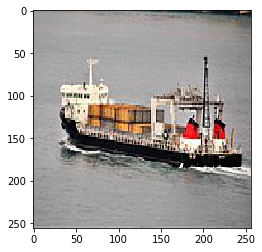

In [28]:
img = pyplot.imshow(toimage(train_image[1]))

In [25]:
len(train_image)

6252

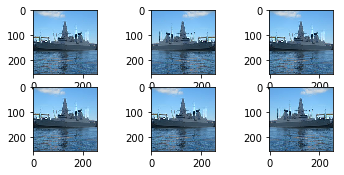

In [71]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
#img = load_img('bird.jpg')
# convert to numpy array
data = train_image[4]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
	# define subplot
    pyplot.subplot(330 + 1 + i)
	# generate batch of images
    batch = it.next()
	# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
	# plot raw pixel data
    pyplot.savefig('test' + str(i) + '.jpg')
    pyplot.imshow(image)
# show the figure
pyplot.show()


In [84]:

# create flipped versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open('rotate.jpg')
#image = train_image[4]
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT).save('h_test.jpg')
# vertical flip
#ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
#pyplot.subplot(311)
#pyplot.imshow(image)
#pyplot.subplot(312)
#pyplot.imshow(hoz_flip)
#pyplot.subplot(313)
#pyplot.imshow(ver_flip)
#pyplot.show()

In [74]:
train_image[0]

array([[[ 84., 153., 210.],
        [ 84., 153., 210.],
        [ 84., 153., 210.],
        ...,
        [ 83., 148., 202.],
        [ 85., 148., 202.],
        [ 85., 148., 202.]],

       [[ 84., 153., 210.],
        [ 84., 153., 210.],
        [ 84., 153., 210.],
        ...,
        [ 83., 148., 202.],
        [ 85., 148., 202.],
        [ 85., 148., 202.]],

       [[ 84., 153., 210.],
        [ 84., 153., 210.],
        [ 84., 153., 210.],
        ...,
        [ 84., 149., 203.],
        [ 85., 148., 202.],
        [ 85., 148., 202.]],

       ...,

       [[ 62., 101., 130.],
        [ 69., 108., 137.],
        [ 63., 102., 131.],
        ...,
        [ 33.,  63.,  87.],
        [ 27.,  70., 105.],
        [ 32.,  75., 110.]],

       [[ 47.,  87., 113.],
        [ 68., 107., 136.],
        [ 69., 110., 140.],
        ...,
        [  0.,  27.,  48.],
        [  2.,  19.,  37.],
        [  3.,  20.,  38.]],

       [[ 47.,  87., 113.],
        [ 68., 107., 136.],
        [ 69., 1

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5001, 28, 28, 3)
(5001,)
(1251, 28, 28, 3)
(1251,)


In [9]:
from matplotlib import pyplot
from scipy.misc import toimage
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
show_imgs(x_test[:16])

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


<Figure size 640x480 with 16 Axes>

In [10]:
x_train=x_train/255
x_test = x_test/255


In [11]:
n_class=6
y_train = keras.utils.to_categorical(y_train,n_class)
y_test = keras.utils.to_categorical(y_test,n_class)

In [12]:
n_conv = 64
k_conv = (3,3)

In [13]:
y_train.shape

(5001, 6)

In [14]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), padding='same',activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=5,verbose=1, validation_data=(x_test,y_test))

Train on 5001 samples, validate on 1251 samples
Epoch 1/5
5001/5001 [==============================] - ETA: 6:13 - loss: 2.6044 - acc: 0.125 - ETA: 4:52 - loss: 2.1995 - acc: 0.203 - ETA: 4:20 - loss: 2.1797 - acc: 0.218 - ETA: 3:59 - loss: 2.3084 - acc: 0.195 - ETA: 3:46 - loss: 2.3235 - acc: 0.187 - ETA: 3:36 - loss: 2.2876 - acc: 0.213 - ETA: 3:32 - loss: 2.2351 - acc: 0.218 - ETA: 3:25 - loss: 2.2369 - acc: 0.222 - ETA: 3:21 - loss: 2.2356 - acc: 0.229 - ETA: 3:15 - loss: 2.2136 - acc: 0.231 - ETA: 3:11 - loss: 2.1633 - acc: 0.241 - ETA: 3:08 - loss: 2.1300 - acc: 0.247 - ETA: 3:05 - loss: 2.0990 - acc: 0.254 - ETA: 3:03 - loss: 2.0994 - acc: 0.252 - ETA: 2:59 - loss: 2.0954 - acc: 0.241 - ETA: 3:00 - loss: 2.0868 - acc: 0.242 - ETA: 2:55 - loss: 2.0877 - acc: 0.240 - ETA: 2:55 - loss: 2.0753 - acc: 0.244 - ETA: 2:54 - loss: 2.0581 - acc: 0.250 - ETA: 2:50 - loss: 2.0371 - acc: 0.254 - ETA: 2:50 - loss: 2.0195 - acc: 0.257 - ETA: 2:48 - loss: 2.0036 - acc: 0.264 - ETA: 2:47 - loss:

5001/5001 [==============================] - ETA: 3:00 - loss: 1.2526 - acc: 0.406 - ETA: 3:02 - loss: 1.2231 - acc: 0.406 - ETA: 2:54 - loss: 1.2027 - acc: 0.437 - ETA: 3:00 - loss: 1.1411 - acc: 0.492 - ETA: 3:01 - loss: 1.1039 - acc: 0.512 - ETA: 3:04 - loss: 1.1409 - acc: 0.494 - ETA: 2:59 - loss: 1.1402 - acc: 0.495 - ETA: 3:00 - loss: 1.1587 - acc: 0.492 - ETA: 3:00 - loss: 1.1810 - acc: 0.496 - ETA: 2:56 - loss: 1.1912 - acc: 0.500 - ETA: 2:53 - loss: 1.1879 - acc: 0.505 - ETA: 2:50 - loss: 1.1925 - acc: 0.502 - ETA: 2:48 - loss: 1.2048 - acc: 0.490 - ETA: 2:47 - loss: 1.1970 - acc: 0.502 - ETA: 2:46 - loss: 1.1938 - acc: 0.502 - ETA: 2:45 - loss: 1.1865 - acc: 0.505 - ETA: 2:44 - loss: 1.1928 - acc: 0.505 - ETA: 2:43 - loss: 1.1910 - acc: 0.500 - ETA: 2:41 - loss: 1.2025 - acc: 0.504 - ETA: 2:40 - loss: 1.1984 - acc: 0.504 - ETA: 2:39 - loss: 1.2061 - acc: 0.506 - ETA: 2:38 - loss: 1.2086 - acc: 0.507 - ETA: 2:36 - loss: 1.2017 - acc: 0.510 - ETA: 2:35 - loss: 1.1948 - acc: 0.5

5001/5001 [==============================] - ETA: 2:46 - loss: 0.9245 - acc: 0.625 - ETA: 2:30 - loss: 0.9500 - acc: 0.640 - ETA: 2:37 - loss: 1.0263 - acc: 0.593 - ETA: 2:38 - loss: 0.9781 - acc: 0.601 - ETA: 2:31 - loss: 0.9425 - acc: 0.618 - ETA: 2:35 - loss: 0.9399 - acc: 0.640 - ETA: 2:29 - loss: 0.9590 - acc: 0.629 - ETA: 2:30 - loss: 0.9942 - acc: 0.593 - ETA: 2:32 - loss: 1.0029 - acc: 0.586 - ETA: 2:32 - loss: 1.0292 - acc: 0.571 - ETA: 2:32 - loss: 1.0466 - acc: 0.568 - ETA: 2:33 - loss: 1.0347 - acc: 0.567 - ETA: 2:35 - loss: 1.0262 - acc: 0.569 - ETA: 2:36 - loss: 1.0363 - acc: 0.564 - ETA: 2:34 - loss: 1.0492 - acc: 0.558 - ETA: 2:35 - loss: 1.0442 - acc: 0.560 - ETA: 2:34 - loss: 1.0399 - acc: 0.562 - ETA: 2:33 - loss: 1.0381 - acc: 0.567 - ETA: 2:31 - loss: 1.0419 - acc: 0.565 - ETA: 2:28 - loss: 1.0344 - acc: 0.571 - ETA: 2:27 - loss: 1.0339 - acc: 0.572 - ETA: 2:27 - loss: 1.0337 - acc: 0.571 - ETA: 2:25 - loss: 1.0280 - acc: 0.573 - ETA: 2:24 - loss: 1.0276 - acc: 0.5

In [22]:
test = pd.read_csv('test_ApKoW4T.csv')

In [23]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('images/'+test['image'][i], target_size=(28,28,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|████████████████████████████████████████████████████████████████████████████| 2680/2680 [00:02<00:00, 1084.08it/s]


In [24]:
prediction = model.predict_classes(test)

In [25]:
pd.DataFrame(prediction).to_csv('test_pred.csv')

In [26]:
model.save('trained_epoch_5.h5')

In [27]:
filepath='trained_epoch_5.h5'

In [30]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
new_model = load_model('trained_epoch_5.h5')

In [31]:
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [32]:
callback_list = [checkpoint]

In [36]:
new_model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test),callbacks = callback_list)

Train on 5001 samples, validate on 1251 samples
Epoch 1/20
5001/5001 [==============================] - ETA: 2:36 - loss: 0.9742 - acc: 0.593 - ETA: 2:37 - loss: 0.8756 - acc: 0.625 - ETA: 2:38 - loss: 0.8576 - acc: 0.645 - ETA: 2:42 - loss: 0.8289 - acc: 0.671 - ETA: 2:43 - loss: 0.8487 - acc: 0.662 - ETA: 2:41 - loss: 0.8400 - acc: 0.671 - ETA: 2:41 - loss: 0.8644 - acc: 0.660 - ETA: 2:43 - loss: 0.8745 - acc: 0.660 - ETA: 2:41 - loss: 0.8639 - acc: 0.652 - ETA: 2:39 - loss: 0.8540 - acc: 0.653 - ETA: 2:35 - loss: 0.8467 - acc: 0.656 - ETA: 2:35 - loss: 0.8361 - acc: 0.656 - ETA: 2:34 - loss: 0.8327 - acc: 0.656 - ETA: 2:32 - loss: 0.8230 - acc: 0.658 - ETA: 2:31 - loss: 0.8269 - acc: 0.656 - ETA: 2:29 - loss: 0.8238 - acc: 0.658 - ETA: 2:27 - loss: 0.8351 - acc: 0.650 - ETA: 2:27 - loss: 0.8457 - acc: 0.645 - ETA: 2:26 - loss: 0.8633 - acc: 0.634 - ETA: 2:27 - loss: 0.8590 - acc: 0.637 - ETA: 2:24 - loss: 0.8640 - acc: 0.638 - ETA: 2:23 - loss: 0.8587 - acc: 0.640 - ETA: 2:21 - loss

5001/5001 [==============================] - ETA: 2:58 - loss: 0.8573 - acc: 0.687 - ETA: 2:50 - loss: 0.8271 - acc: 0.656 - ETA: 2:54 - loss: 0.7869 - acc: 0.677 - ETA: 2:43 - loss: 0.7843 - acc: 0.687 - ETA: 2:40 - loss: 0.7789 - acc: 0.700 - ETA: 2:41 - loss: 0.8030 - acc: 0.687 - ETA: 2:43 - loss: 0.8095 - acc: 0.687 - ETA: 2:43 - loss: 0.8221 - acc: 0.683 - ETA: 2:42 - loss: 0.8037 - acc: 0.684 - ETA: 2:40 - loss: 0.7938 - acc: 0.684 - ETA: 2:39 - loss: 0.8283 - acc: 0.670 - ETA: 2:38 - loss: 0.8264 - acc: 0.679 - ETA: 2:37 - loss: 0.8051 - acc: 0.685 - ETA: 2:35 - loss: 0.8138 - acc: 0.678 - ETA: 2:33 - loss: 0.7937 - acc: 0.687 - ETA: 2:31 - loss: 0.7846 - acc: 0.695 - ETA: 2:31 - loss: 0.7786 - acc: 0.698 - ETA: 2:32 - loss: 0.7907 - acc: 0.689 - ETA: 2:31 - loss: 0.7967 - acc: 0.684 - ETA: 2:28 - loss: 0.7947 - acc: 0.687 - ETA: 2:26 - loss: 0.7850 - acc: 0.689 - ETA: 2:25 - loss: 0.7787 - acc: 0.693 - ETA: 2:24 - loss: 0.7774 - acc: 0.695 - ETA: 2:22 - loss: 0.7674 - acc: 0.7

5001/5001 [==============================] - ETA: 2:43 - loss: 1.0002 - acc: 0.656 - ETA: 2:52 - loss: 0.8245 - acc: 0.687 - ETA: 2:52 - loss: 0.8608 - acc: 0.656 - ETA: 2:44 - loss: 0.8048 - acc: 0.664 - ETA: 2:45 - loss: 0.8174 - acc: 0.662 - ETA: 2:45 - loss: 0.7840 - acc: 0.682 - ETA: 2:44 - loss: 0.7756 - acc: 0.687 - ETA: 2:44 - loss: 0.7694 - acc: 0.691 - ETA: 2:42 - loss: 0.7570 - acc: 0.694 - ETA: 2:42 - loss: 0.7532 - acc: 0.690 - ETA: 2:41 - loss: 0.7514 - acc: 0.690 - ETA: 2:43 - loss: 0.7407 - acc: 0.692 - ETA: 2:39 - loss: 0.7345 - acc: 0.699 - ETA: 2:38 - loss: 0.7320 - acc: 0.700 - ETA: 2:36 - loss: 0.7346 - acc: 0.706 - ETA: 2:36 - loss: 0.7283 - acc: 0.709 - ETA: 2:33 - loss: 0.7295 - acc: 0.705 - ETA: 2:30 - loss: 0.7230 - acc: 0.710 - ETA: 2:28 - loss: 0.7330 - acc: 0.710 - ETA: 2:27 - loss: 0.7372 - acc: 0.709 - ETA: 2:26 - loss: 0.7327 - acc: 0.711 - ETA: 2:26 - loss: 0.7381 - acc: 0.708 - ETA: 2:24 - loss: 0.7353 - acc: 0.709 - ETA: 2:23 - loss: 0.7482 - acc: 0.7

5001/5001 [==============================] - ETA: 2:39 - loss: 0.5343 - acc: 0.781 - ETA: 2:45 - loss: 0.4662 - acc: 0.828 - ETA: 2:55 - loss: 0.4578 - acc: 0.833 - ETA: 2:49 - loss: 0.4960 - acc: 0.804 - ETA: 2:42 - loss: 0.5783 - acc: 0.762 - ETA: 2:36 - loss: 0.5921 - acc: 0.744 - ETA: 2:37 - loss: 0.5743 - acc: 0.758 - ETA: 2:35 - loss: 0.6044 - acc: 0.746 - ETA: 2:35 - loss: 0.6137 - acc: 0.753 - ETA: 2:36 - loss: 0.6054 - acc: 0.762 - ETA: 2:35 - loss: 0.6297 - acc: 0.761 - ETA: 2:35 - loss: 0.6263 - acc: 0.760 - ETA: 2:35 - loss: 0.6283 - acc: 0.759 - ETA: 2:36 - loss: 0.6376 - acc: 0.758 - ETA: 2:35 - loss: 0.6369 - acc: 0.762 - ETA: 2:33 - loss: 0.6357 - acc: 0.763 - ETA: 2:32 - loss: 0.6395 - acc: 0.759 - ETA: 2:30 - loss: 0.6352 - acc: 0.758 - ETA: 2:29 - loss: 0.6332 - acc: 0.758 - ETA: 2:27 - loss: 0.6314 - acc: 0.756 - ETA: 2:26 - loss: 0.6265 - acc: 0.756 - ETA: 2:24 - loss: 0.6181 - acc: 0.761 - ETA: 2:24 - loss: 0.6216 - acc: 0.760 - ETA: 2:22 - loss: 0.6297 - acc: 0.7

5001/5001 [==============================] - ETA: 2:34 - loss: 0.4582 - acc: 0.843 - ETA: 2:46 - loss: 0.6078 - acc: 0.750 - ETA: 2:48 - loss: 0.5822 - acc: 0.770 - ETA: 2:49 - loss: 0.5388 - acc: 0.789 - ETA: 2:49 - loss: 0.5199 - acc: 0.806 - ETA: 2:46 - loss: 0.5297 - acc: 0.796 - ETA: 2:47 - loss: 0.5379 - acc: 0.772 - ETA: 2:41 - loss: 0.5559 - acc: 0.769 - ETA: 2:39 - loss: 0.5872 - acc: 0.756 - ETA: 2:37 - loss: 0.5962 - acc: 0.756 - ETA: 2:37 - loss: 0.5970 - acc: 0.750 - ETA: 2:38 - loss: 0.6017 - acc: 0.747 - ETA: 2:39 - loss: 0.6053 - acc: 0.745 - ETA: 2:38 - loss: 0.6100 - acc: 0.736 - ETA: 2:38 - loss: 0.6055 - acc: 0.743 - ETA: 2:37 - loss: 0.6216 - acc: 0.740 - ETA: 2:37 - loss: 0.6149 - acc: 0.748 - ETA: 2:35 - loss: 0.6001 - acc: 0.756 - ETA: 2:33 - loss: 0.6127 - acc: 0.751 - ETA: 2:32 - loss: 0.6180 - acc: 0.750 - ETA: 2:30 - loss: 0.6341 - acc: 0.744 - ETA: 2:28 - loss: 0.6365 - acc: 0.744 - ETA: 2:26 - loss: 0.6362 - acc: 0.747 - ETA: 2:26 - loss: 0.6310 - acc: 0.7

5001/5001 [==============================] - ETA: 2:21 - loss: 0.5330 - acc: 0.750 - ETA: 2:30 - loss: 0.5785 - acc: 0.765 - ETA: 2:26 - loss: 0.5089 - acc: 0.781 - ETA: 2:27 - loss: 0.4870 - acc: 0.781 - ETA: 2:29 - loss: 0.4959 - acc: 0.781 - ETA: 2:30 - loss: 0.5304 - acc: 0.760 - ETA: 2:31 - loss: 0.5454 - acc: 0.745 - ETA: 2:31 - loss: 0.5482 - acc: 0.738 - ETA: 2:29 - loss: 0.5439 - acc: 0.746 - ETA: 2:27 - loss: 0.5647 - acc: 0.728 - ETA: 2:29 - loss: 0.5551 - acc: 0.738 - ETA: 2:28 - loss: 0.5507 - acc: 0.747 - ETA: 2:26 - loss: 0.5669 - acc: 0.745 - ETA: 2:27 - loss: 0.5866 - acc: 0.743 - ETA: 2:28 - loss: 0.5996 - acc: 0.737 - ETA: 2:28 - loss: 0.6126 - acc: 0.730 - ETA: 2:27 - loss: 0.6144 - acc: 0.735 - ETA: 2:27 - loss: 0.6096 - acc: 0.743 - ETA: 2:26 - loss: 0.6041 - acc: 0.748 - ETA: 2:25 - loss: 0.6026 - acc: 0.750 - ETA: 2:24 - loss: 0.6038 - acc: 0.754 - ETA: 2:23 - loss: 0.6041 - acc: 0.751 - ETA: 2:22 - loss: 0.5971 - acc: 0.754 - ETA: 2:21 - loss: 0.5941 - acc: 0.7

5001/5001 [==============================] - ETA: 3:00 - loss: 0.6518 - acc: 0.750 - ETA: 2:58 - loss: 0.6161 - acc: 0.765 - ETA: 3:01 - loss: 0.5455 - acc: 0.822 - ETA: 2:53 - loss: 0.5234 - acc: 0.835 - ETA: 2:50 - loss: 0.5632 - acc: 0.818 - ETA: 2:50 - loss: 0.5188 - acc: 0.833 - ETA: 2:50 - loss: 0.4967 - acc: 0.834 - ETA: 2:46 - loss: 0.4770 - acc: 0.847 - ETA: 2:42 - loss: 0.4708 - acc: 0.847 - ETA: 2:40 - loss: 0.4589 - acc: 0.850 - ETA: 2:39 - loss: 0.4556 - acc: 0.846 - ETA: 2:38 - loss: 0.4617 - acc: 0.841 - ETA: 2:38 - loss: 0.4487 - acc: 0.846 - ETA: 2:36 - loss: 0.4372 - acc: 0.852 - ETA: 2:36 - loss: 0.4569 - acc: 0.843 - ETA: 2:35 - loss: 0.4536 - acc: 0.839 - ETA: 2:34 - loss: 0.4506 - acc: 0.840 - ETA: 2:32 - loss: 0.4449 - acc: 0.840 - ETA: 2:31 - loss: 0.4551 - acc: 0.837 - ETA: 2:31 - loss: 0.4588 - acc: 0.835 - ETA: 2:28 - loss: 0.4527 - acc: 0.837 - ETA: 2:27 - loss: 0.4535 - acc: 0.838 - ETA: 2:26 - loss: 0.4643 - acc: 0.832 - ETA: 2:25 - loss: 0.4668 - acc: 0.8

5001/5001 [==============================] - ETA: 2:25 - loss: 0.3791 - acc: 0.812 - ETA: 2:46 - loss: 0.3549 - acc: 0.843 - ETA: 2:44 - loss: 0.4024 - acc: 0.843 - ETA: 2:41 - loss: 0.4577 - acc: 0.812 - ETA: 2:38 - loss: 0.4330 - acc: 0.818 - ETA: 2:42 - loss: 0.4460 - acc: 0.812 - ETA: 2:39 - loss: 0.4440 - acc: 0.808 - ETA: 2:35 - loss: 0.4525 - acc: 0.808 - ETA: 2:35 - loss: 0.4681 - acc: 0.809 - ETA: 2:35 - loss: 0.4561 - acc: 0.818 - ETA: 2:35 - loss: 0.4457 - acc: 0.826 - ETA: 2:36 - loss: 0.4419 - acc: 0.822 - ETA: 2:36 - loss: 0.4562 - acc: 0.817 - ETA: 2:35 - loss: 0.4582 - acc: 0.817 - ETA: 2:33 - loss: 0.4618 - acc: 0.816 - ETA: 2:33 - loss: 0.4590 - acc: 0.818 - ETA: 2:32 - loss: 0.4569 - acc: 0.819 - ETA: 2:30 - loss: 0.4682 - acc: 0.816 - ETA: 2:30 - loss: 0.4697 - acc: 0.814 - ETA: 2:29 - loss: 0.4675 - acc: 0.820 - ETA: 2:28 - loss: 0.4631 - acc: 0.821 - ETA: 2:27 - loss: 0.4622 - acc: 0.823 - ETA: 2:25 - loss: 0.4681 - acc: 0.820 - ETA: 2:24 - loss: 0.4644 - acc: 0.8

5001/5001 [==============================] - ETA: 2:15 - loss: 0.5007 - acc: 0.750 - ETA: 2:41 - loss: 0.4229 - acc: 0.812 - ETA: 2:42 - loss: 0.4441 - acc: 0.812 - ETA: 2:49 - loss: 0.4228 - acc: 0.828 - ETA: 2:50 - loss: 0.4198 - acc: 0.831 - ETA: 2:45 - loss: 0.4558 - acc: 0.822 - ETA: 2:42 - loss: 0.4358 - acc: 0.834 - ETA: 2:41 - loss: 0.4274 - acc: 0.839 - ETA: 2:42 - loss: 0.4210 - acc: 0.843 - ETA: 2:39 - loss: 0.4233 - acc: 0.837 - ETA: 2:39 - loss: 0.4059 - acc: 0.846 - ETA: 2:39 - loss: 0.4019 - acc: 0.849 - ETA: 2:38 - loss: 0.3959 - acc: 0.851 - ETA: 2:36 - loss: 0.4068 - acc: 0.848 - ETA: 2:33 - loss: 0.4043 - acc: 0.845 - ETA: 2:33 - loss: 0.4082 - acc: 0.843 - ETA: 2:32 - loss: 0.4126 - acc: 0.843 - ETA: 2:29 - loss: 0.4156 - acc: 0.840 - ETA: 2:30 - loss: 0.4292 - acc: 0.838 - ETA: 2:30 - loss: 0.4284 - acc: 0.840 - ETA: 2:27 - loss: 0.4226 - acc: 0.843 - ETA: 2:25 - loss: 0.4225 - acc: 0.845 - ETA: 2:24 - loss: 0.4212 - acc: 0.846 - ETA: 2:22 - loss: 0.4236 - acc: 0.8

5001/5001 [==============================] - ETA: 2:51 - loss: 0.2388 - acc: 0.875 - ETA: 2:45 - loss: 0.3993 - acc: 0.859 - ETA: 2:52 - loss: 0.3818 - acc: 0.864 - ETA: 2:49 - loss: 0.3846 - acc: 0.875 - ETA: 2:43 - loss: 0.3970 - acc: 0.875 - ETA: 2:43 - loss: 0.3926 - acc: 0.869 - ETA: 2:45 - loss: 0.3994 - acc: 0.861 - ETA: 2:44 - loss: 0.3855 - acc: 0.871 - ETA: 2:46 - loss: 0.4121 - acc: 0.864 - ETA: 2:45 - loss: 0.4051 - acc: 0.868 - ETA: 2:44 - loss: 0.4079 - acc: 0.869 - ETA: 2:43 - loss: 0.4026 - acc: 0.872 - ETA: 2:43 - loss: 0.4081 - acc: 0.865 - ETA: 2:41 - loss: 0.4095 - acc: 0.868 - ETA: 2:40 - loss: 0.4137 - acc: 0.862 - ETA: 2:38 - loss: 0.4147 - acc: 0.861 - ETA: 2:37 - loss: 0.4060 - acc: 0.867 - ETA: 2:37 - loss: 0.4006 - acc: 0.868 - ETA: 2:35 - loss: 0.3979 - acc: 0.865 - ETA: 2:33 - loss: 0.3988 - acc: 0.864 - ETA: 2:31 - loss: 0.3970 - acc: 0.866 - ETA: 2:30 - loss: 0.3978 - acc: 0.862 - ETA: 2:30 - loss: 0.4003 - acc: 0.861 - ETA: 2:28 - loss: 0.3992 - acc: 0.8

In [39]:
new_model.save('trained_epoch_25.h5')

In [40]:
prediction = new_model.predict_classes(test)

In [41]:
pd.DataFrame(prediction).to_csv('test_pred.csv')

In [42]:
filepath='trained_epoch_25.h5'

In [43]:
new_model1 = load_model('trained_epoch_25.h5')

In [44]:
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [45]:
callback_list = [checkpoint]

In [46]:
new_model1.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test),callbacks = callback_list)

Train on 5001 samples, validate on 1251 samples
Epoch 1/20
5001/5001 [==============================] - ETA: 4:15 - loss: 0.2273 - acc: 0.906 - ETA: 3:18 - loss: 0.3329 - acc: 0.890 - ETA: 3:04 - loss: 0.2969 - acc: 0.906 - ETA: 3:03 - loss: 0.3028 - acc: 0.921 - ETA: 2:57 - loss: 0.3353 - acc: 0.906 - ETA: 2:52 - loss: 0.3231 - acc: 0.911 - ETA: 2:49 - loss: 0.3641 - acc: 0.892 - ETA: 2:44 - loss: 0.3500 - acc: 0.898 - ETA: 2:45 - loss: 0.3526 - acc: 0.899 - ETA: 2:42 - loss: 0.3368 - acc: 0.903 - ETA: 2:38 - loss: 0.3612 - acc: 0.883 - ETA: 2:37 - loss: 0.3553 - acc: 0.885 - ETA: 2:34 - loss: 0.3631 - acc: 0.879 - ETA: 2:33 - loss: 0.3622 - acc: 0.872 - ETA: 2:30 - loss: 0.3671 - acc: 0.870 - ETA: 2:28 - loss: 0.3608 - acc: 0.871 - ETA: 2:26 - loss: 0.3641 - acc: 0.865 - ETA: 2:25 - loss: 0.3661 - acc: 0.868 - ETA: 2:25 - loss: 0.3616 - acc: 0.866 - ETA: 2:25 - loss: 0.3609 - acc: 0.867 - ETA: 2:24 - loss: 0.3574 - acc: 0.870 - ETA: 2:23 - loss: 0.3520 - acc: 0.875 - ETA: 2:22 - loss

5001/5001 [==============================] - ETA: 2:54 - loss: 0.3402 - acc: 0.937 - ETA: 2:44 - loss: 0.3884 - acc: 0.859 - ETA: 2:43 - loss: 0.3317 - acc: 0.885 - ETA: 2:37 - loss: 0.2981 - acc: 0.890 - ETA: 2:34 - loss: 0.2993 - acc: 0.900 - ETA: 2:37 - loss: 0.3067 - acc: 0.885 - ETA: 2:33 - loss: 0.3509 - acc: 0.879 - ETA: 2:31 - loss: 0.3585 - acc: 0.886 - ETA: 2:31 - loss: 0.3949 - acc: 0.868 - ETA: 2:32 - loss: 0.3770 - acc: 0.878 - ETA: 2:29 - loss: 0.3552 - acc: 0.889 - ETA: 2:29 - loss: 0.3510 - acc: 0.888 - ETA: 2:30 - loss: 0.3519 - acc: 0.884 - ETA: 2:29 - loss: 0.3409 - acc: 0.890 - ETA: 2:29 - loss: 0.3366 - acc: 0.889 - ETA: 2:28 - loss: 0.3270 - acc: 0.896 - ETA: 2:28 - loss: 0.3281 - acc: 0.898 - ETA: 2:28 - loss: 0.3404 - acc: 0.888 - ETA: 2:27 - loss: 0.3386 - acc: 0.888 - ETA: 2:25 - loss: 0.3384 - acc: 0.887 - ETA: 2:24 - loss: 0.3457 - acc: 0.885 - ETA: 2:23 - loss: 0.3474 - acc: 0.883 - ETA: 2:22 - loss: 0.3406 - acc: 0.887 - ETA: 2:22 - loss: 0.3380 - acc: 0.8

5001/5001 [==============================] - ETA: 2:53 - loss: 0.2232 - acc: 0.968 - ETA: 2:23 - loss: 0.2552 - acc: 0.921 - ETA: 2:25 - loss: 0.2356 - acc: 0.927 - ETA: 2:30 - loss: 0.3289 - acc: 0.882 - ETA: 2:34 - loss: 0.3735 - acc: 0.862 - ETA: 2:33 - loss: 0.3626 - acc: 0.875 - ETA: 2:35 - loss: 0.3684 - acc: 0.866 - ETA: 2:31 - loss: 0.3831 - acc: 0.855 - ETA: 2:32 - loss: 0.3595 - acc: 0.868 - ETA: 2:33 - loss: 0.3639 - acc: 0.865 - ETA: 2:34 - loss: 0.3568 - acc: 0.869 - ETA: 2:32 - loss: 0.3533 - acc: 0.867 - ETA: 2:33 - loss: 0.3466 - acc: 0.872 - ETA: 2:32 - loss: 0.3591 - acc: 0.868 - ETA: 2:32 - loss: 0.3731 - acc: 0.858 - ETA: 2:31 - loss: 0.3697 - acc: 0.859 - ETA: 2:29 - loss: 0.3660 - acc: 0.858 - ETA: 2:29 - loss: 0.3664 - acc: 0.859 - ETA: 2:29 - loss: 0.3584 - acc: 0.863 - ETA: 2:27 - loss: 0.3607 - acc: 0.860 - ETA: 2:25 - loss: 0.3578 - acc: 0.864 - ETA: 2:23 - loss: 0.3473 - acc: 0.869 - ETA: 2:23 - loss: 0.3444 - acc: 0.869 - ETA: 2:21 - loss: 0.3396 - acc: 0.8

5001/5001 [==============================] - ETA: 2:02 - loss: 0.3368 - acc: 0.843 - ETA: 2:34 - loss: 0.2763 - acc: 0.875 - ETA: 2:42 - loss: 0.3024 - acc: 0.864 - ETA: 2:42 - loss: 0.2648 - acc: 0.890 - ETA: 2:41 - loss: 0.2640 - acc: 0.893 - ETA: 2:39 - loss: 0.2537 - acc: 0.906 - ETA: 2:38 - loss: 0.2402 - acc: 0.915 - ETA: 2:36 - loss: 0.2317 - acc: 0.921 - ETA: 2:35 - loss: 0.2623 - acc: 0.913 - ETA: 2:35 - loss: 0.2724 - acc: 0.912 - ETA: 2:36 - loss: 0.2846 - acc: 0.906 - ETA: 2:34 - loss: 0.2707 - acc: 0.914 - ETA: 2:32 - loss: 0.2714 - acc: 0.913 - ETA: 2:32 - loss: 0.2710 - acc: 0.912 - ETA: 2:32 - loss: 0.2682 - acc: 0.914 - ETA: 2:32 - loss: 0.2784 - acc: 0.906 - ETA: 2:31 - loss: 0.2973 - acc: 0.902 - ETA: 2:31 - loss: 0.3043 - acc: 0.899 - ETA: 2:28 - loss: 0.3122 - acc: 0.893 - ETA: 2:28 - loss: 0.3130 - acc: 0.892 - ETA: 2:27 - loss: 0.3053 - acc: 0.894 - ETA: 2:24 - loss: 0.3114 - acc: 0.894 - ETA: 2:24 - loss: 0.3242 - acc: 0.889 - ETA: 2:23 - loss: 0.3270 - acc: 0.8

5001/5001 [==============================] - ETA: 2:41 - loss: 0.2416 - acc: 0.968 - ETA: 2:38 - loss: 0.2470 - acc: 0.937 - ETA: 2:42 - loss: 0.2320 - acc: 0.947 - ETA: 2:40 - loss: 0.2441 - acc: 0.929 - ETA: 2:39 - loss: 0.2510 - acc: 0.925 - ETA: 2:43 - loss: 0.2448 - acc: 0.927 - ETA: 2:37 - loss: 0.2447 - acc: 0.928 - ETA: 2:38 - loss: 0.2508 - acc: 0.925 - ETA: 2:37 - loss: 0.2643 - acc: 0.920 - ETA: 2:33 - loss: 0.2515 - acc: 0.921 - ETA: 2:33 - loss: 0.2420 - acc: 0.929 - ETA: 2:30 - loss: 0.2438 - acc: 0.929 - ETA: 2:31 - loss: 0.2578 - acc: 0.927 - ETA: 2:30 - loss: 0.2585 - acc: 0.924 - ETA: 2:28 - loss: 0.2658 - acc: 0.922 - ETA: 2:27 - loss: 0.2877 - acc: 0.918 - ETA: 2:26 - loss: 0.2928 - acc: 0.915 - ETA: 2:24 - loss: 0.2917 - acc: 0.916 - ETA: 2:22 - loss: 0.2929 - acc: 0.914 - ETA: 2:22 - loss: 0.2968 - acc: 0.912 - ETA: 2:21 - loss: 0.2952 - acc: 0.912 - ETA: 2:21 - loss: 0.2921 - acc: 0.914 - ETA: 2:20 - loss: 0.2946 - acc: 0.913 - ETA: 2:19 - loss: 0.2985 - acc: 0.9

5001/5001 [==============================] - ETA: 2:17 - loss: 0.3038 - acc: 0.875 - ETA: 2:16 - loss: 0.3161 - acc: 0.859 - ETA: 2:23 - loss: 0.3331 - acc: 0.854 - ETA: 2:28 - loss: 0.2948 - acc: 0.875 - ETA: 2:30 - loss: 0.3105 - acc: 0.875 - ETA: 2:32 - loss: 0.3156 - acc: 0.864 - ETA: 2:33 - loss: 0.3173 - acc: 0.866 - ETA: 2:32 - loss: 0.3116 - acc: 0.875 - ETA: 2:30 - loss: 0.3289 - acc: 0.881 - ETA: 2:31 - loss: 0.3200 - acc: 0.887 - ETA: 2:30 - loss: 0.3087 - acc: 0.894 - ETA: 2:31 - loss: 0.3004 - acc: 0.901 - ETA: 2:29 - loss: 0.2926 - acc: 0.903 - ETA: 2:27 - loss: 0.2831 - acc: 0.908 - ETA: 2:26 - loss: 0.2826 - acc: 0.908 - ETA: 2:25 - loss: 0.2757 - acc: 0.910 - ETA: 2:23 - loss: 0.2749 - acc: 0.911 - ETA: 2:23 - loss: 0.2751 - acc: 0.913 - ETA: 2:22 - loss: 0.2779 - acc: 0.906 - ETA: 2:21 - loss: 0.2782 - acc: 0.909 - ETA: 2:21 - loss: 0.2785 - acc: 0.909 - ETA: 2:21 - loss: 0.2832 - acc: 0.906 - ETA: 2:20 - loss: 0.2760 - acc: 0.909 - ETA: 2:19 - loss: 0.2680 - acc: 0.9

5001/5001 [==============================] - ETA: 3:06 - loss: 0.2557 - acc: 0.937 - ETA: 2:58 - loss: 0.2622 - acc: 0.921 - ETA: 2:55 - loss: 0.2263 - acc: 0.947 - ETA: 2:47 - loss: 0.2204 - acc: 0.945 - ETA: 2:43 - loss: 0.2046 - acc: 0.950 - ETA: 2:43 - loss: 0.1978 - acc: 0.953 - ETA: 2:44 - loss: 0.1983 - acc: 0.946 - ETA: 2:47 - loss: 0.2054 - acc: 0.949 - ETA: 2:44 - loss: 0.2243 - acc: 0.941 - ETA: 2:43 - loss: 0.2338 - acc: 0.934 - ETA: 2:41 - loss: 0.2493 - acc: 0.931 - ETA: 2:39 - loss: 0.2479 - acc: 0.934 - ETA: 2:41 - loss: 0.2454 - acc: 0.932 - ETA: 2:41 - loss: 0.2449 - acc: 0.935 - ETA: 2:42 - loss: 0.2475 - acc: 0.931 - ETA: 2:39 - loss: 0.2473 - acc: 0.929 - ETA: 2:38 - loss: 0.2458 - acc: 0.932 - ETA: 2:37 - loss: 0.2468 - acc: 0.932 - ETA: 2:35 - loss: 0.2416 - acc: 0.934 - ETA: 2:34 - loss: 0.2453 - acc: 0.931 - ETA: 2:33 - loss: 0.2407 - acc: 0.934 - ETA: 2:32 - loss: 0.2372 - acc: 0.936 - ETA: 2:30 - loss: 0.2377 - acc: 0.936 - ETA: 2:28 - loss: 0.2469 - acc: 0.9

5001/5001 [==============================] - ETA: 2:44 - loss: 0.3229 - acc: 0.875 - ETA: 2:46 - loss: 0.2963 - acc: 0.890 - ETA: 2:47 - loss: 0.2450 - acc: 0.916 - ETA: 2:54 - loss: 0.2337 - acc: 0.929 - ETA: 2:48 - loss: 0.2446 - acc: 0.931 - ETA: 2:50 - loss: 0.2458 - acc: 0.927 - ETA: 2:47 - loss: 0.2520 - acc: 0.919 - ETA: 2:47 - loss: 0.2530 - acc: 0.921 - ETA: 2:45 - loss: 0.2555 - acc: 0.923 - ETA: 2:44 - loss: 0.2453 - acc: 0.931 - ETA: 2:42 - loss: 0.2430 - acc: 0.934 - ETA: 2:41 - loss: 0.2519 - acc: 0.929 - ETA: 2:41 - loss: 0.2519 - acc: 0.927 - ETA: 2:40 - loss: 0.2552 - acc: 0.928 - ETA: 2:40 - loss: 0.2590 - acc: 0.922 - ETA: 2:38 - loss: 0.2556 - acc: 0.921 - ETA: 2:36 - loss: 0.2535 - acc: 0.924 - ETA: 2:35 - loss: 0.2583 - acc: 0.918 - ETA: 2:33 - loss: 0.2521 - acc: 0.922 - ETA: 2:31 - loss: 0.2523 - acc: 0.923 - ETA: 2:30 - loss: 0.2463 - acc: 0.927 - ETA: 2:30 - loss: 0.2415 - acc: 0.929 - ETA: 2:29 - loss: 0.2399 - acc: 0.929 - ETA: 2:27 - loss: 0.2370 - acc: 0.9

5001/5001 [==============================] - ETA: 3:03 - loss: 0.1331 - acc: 0.968 - ETA: 2:48 - loss: 0.1542 - acc: 0.968 - ETA: 2:48 - loss: 0.1693 - acc: 0.958 - ETA: 2:50 - loss: 0.1673 - acc: 0.968 - ETA: 2:47 - loss: 0.1685 - acc: 0.968 - ETA: 2:42 - loss: 0.1855 - acc: 0.958 - ETA: 2:43 - loss: 0.2051 - acc: 0.955 - ETA: 2:42 - loss: 0.2143 - acc: 0.949 - ETA: 2:40 - loss: 0.2071 - acc: 0.954 - ETA: 2:38 - loss: 0.2159 - acc: 0.953 - ETA: 2:38 - loss: 0.2148 - acc: 0.951 - ETA: 2:37 - loss: 0.2403 - acc: 0.942 - ETA: 2:37 - loss: 0.2454 - acc: 0.942 - ETA: 2:35 - loss: 0.2489 - acc: 0.937 - ETA: 2:33 - loss: 0.2479 - acc: 0.935 - ETA: 2:32 - loss: 0.2408 - acc: 0.939 - ETA: 2:32 - loss: 0.2394 - acc: 0.939 - ETA: 2:32 - loss: 0.2521 - acc: 0.932 - ETA: 2:29 - loss: 0.2533 - acc: 0.934 - ETA: 2:29 - loss: 0.2492 - acc: 0.935 - ETA: 2:28 - loss: 0.2531 - acc: 0.933 - ETA: 2:27 - loss: 0.2502 - acc: 0.933 - ETA: 2:27 - loss: 0.2512 - acc: 0.929 - ETA: 2:25 - loss: 0.2457 - acc: 0.9

5001/5001 [==============================] - ETA: 2:51 - loss: 0.3428 - acc: 0.906 - ETA: 2:34 - loss: 0.2714 - acc: 0.921 - ETA: 2:35 - loss: 0.2205 - acc: 0.947 - ETA: 2:37 - loss: 0.1966 - acc: 0.960 - ETA: 2:30 - loss: 0.2432 - acc: 0.937 - ETA: 2:35 - loss: 0.2334 - acc: 0.937 - ETA: 2:34 - loss: 0.2315 - acc: 0.937 - ETA: 2:33 - loss: 0.2264 - acc: 0.937 - ETA: 2:34 - loss: 0.2328 - acc: 0.937 - ETA: 2:36 - loss: 0.2383 - acc: 0.931 - ETA: 2:35 - loss: 0.2284 - acc: 0.937 - ETA: 2:35 - loss: 0.2218 - acc: 0.937 - ETA: 2:34 - loss: 0.2204 - acc: 0.939 - ETA: 2:33 - loss: 0.2273 - acc: 0.935 - ETA: 2:32 - loss: 0.2256 - acc: 0.933 - ETA: 2:32 - loss: 0.2257 - acc: 0.929 - ETA: 2:30 - loss: 0.2207 - acc: 0.932 - ETA: 2:29 - loss: 0.2170 - acc: 0.932 - ETA: 2:27 - loss: 0.2275 - acc: 0.930 - ETA: 2:26 - loss: 0.2224 - acc: 0.934 - ETA: 2:25 - loss: 0.2218 - acc: 0.936 - ETA: 2:25 - loss: 0.2193 - acc: 0.936 - ETA: 2:25 - loss: 0.2186 - acc: 0.934 - ETA: 2:24 - loss: 0.2207 - acc: 0.9

In [50]:
prediction=new_model1.predict_classes(test)

In [51]:
pd.DataFrame(prediction).to_csv('test_pred.csv')